# AVR-C

A notebook for video Tutorials by Craig Hollinger

The video tutorial series can be found in [Youtube](https://www.youtube.com/playlist?list=PLVT2wB-IEJ0By8e-VMSGATXUQRsErBF-j). This was transferred to Jupyters notebook for the author's convenience.

### The 'main'

In C, all the programs are written in 'void main(void)'. However in Arduino we can't really see this 'void main(void)' unless we find it in the source code. And if we do, we can see that it encapsulates void setup() and void loop():

                                    <intentional space> 

### Different means of Communicating with other MCU

* I2C.c

Now, most of the accelerometer, gyroscope, magnetometer are communicated in I2C communicatio bus which is commonly known in Arduino as 
'Wire' or Wire.h, Wire.c. In Atmel Studio this I2C bus is known as TWI or Two Wire Interface. Atmega328 has an I2C peripheral to communicate
with other devices using the I2C bus.

* SPI.c

For devices such as display might use the SPI bus. It is another form of communication and has another format from I2C.

* UART.c

For devices such as GPS, there is another peripheral for that which is UART.

* adxl3245.c

Aside from communication files, we also need diver files or the codes that run specific devices. We also need to write them so 
we can communication with such device.

                                    <intentional space> 

### HEADER files

Header or '.h' files are the files that produced when we compile our '.c' code and those .h are the ones being included in our 'main'.
These '.h' files are being written in #include. Sometimes we also need to specify where the address/path of this '.h' files.

The #include <avr/io.h> is automatically included in Atmel Studio. What it does is that it defines all the registers and bits in the 
registers in the MCU you selected.

                                    <intentional space> 

### Ports and Pins

Aside from communication files, we also need driver files or the codes that run specific devices. We also need to write them so 
we can communication with such device.

In the schematic of Atmega328, we can see that the pins are connected in every Port. We can see Port B , Port C etc. but for no reason AVR doesn't have Port A. AVR microcontroller were designed such that every port has 8 pins.

In blinking the stock led of the Arduino Board we can see if we follow the schematic that the led is connected to Port Pin B5.
Atmega328 has 3 Ports : Port B, Port C and Port D. Of each port there is a separate register that controls them. One register is called DDR which stands for 'Date Direction Register' which sets and clear bits in that register. Another register associated with Ports is called Pin, and that is when we read that register, we read whatever the state on that pin whether its a high or a low. And the third register is called Port and when we write to that register, we write to the IO pin selected. 

If we go to the Atmega328 datasheet and find PortB7 and PortB6, we should take note that this pins are already hooked up in the arduino since it is where the Crystal Oscillator are connected and so they are not available as IO pins. 


                                    <intentional space> 

### Bit Operations

In C, there is an special operator aside from the +, - , *, / we knew. It is called bit shifting.

For example we will bit shift:

Remember that everything in the microcontroller is in binary hence the 5 needs to be converted into 8 bit binary which is:

Also we need to take note that the format follows, (Number) << (How much Shift) and shifting the bits for 4 places, will make:

Remember that the bits being removed through the process of shifting will be replaced with 0's.

##### AND (Truth Table)

##### OR (Truth Table)

##### Mask

MASK is defined as a byte or set of bits we AND or OR with another bit to get what we want for that bit.

* Get

Getting a value of a certain bit, Say we want to know the value of a 3rd bit in a byte.

Here we can see that the output will be equal to 1 which is the value of the 3rd bit.

* Clear

Clearing a certain bit.

To see clearly, let's assume that x as 1:

Hence the Output will be x!.

Another, lets assume that x is 0:

Hence the Ouput is again x!

Here, we see that we clear a certain bit without affecting all other bits.

* Write

Writing to a certain bit.

To see clearly, let's assume that x as 1:

Hence the Output will be x!.

Another, lets assume that x is 0:

Hence the Ouput is again x!

Again, we write to a certain bit without affecting others.

                                    <intentional space> 

### Blink Sketch

Blink the stock led on the Arduino Uno board.

This header file includes all the registers and bits for the MCU we selected.

 Library for delay.

Define the Clock Speed which is 16 Mhz or 16 000 000 Hertz. The reason why we put 'UL' at the end of 16000000 is because we want to let the MCU know that the F_CPU contains a big number or Unsigned Long. Long is a 4 byte variable hence it can hold values up to 0 -> 2^(32) or 0 -> 4,294,967,296 and hence includes 16,000,000

First is we need to define the Pin as output in the Data Direction Register, this can be done in many different ways, one way is by defining it as binary. Take note that the Port Pin numbering starts from 0-7 and Port Pin 0 is the rightmost in the binary.

Setting Port Pin B5 as output:

However doing this would modify all the other bits to '0'. This is only good for our application since we are not interested in all in all other bits except the Port Pin B5.

#### AVR Studio 7 Simulator

DDRB = 0b00100000; 
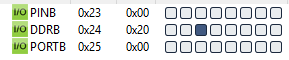

PORTB = 0b00100000;
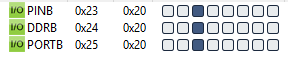

PORTB = 0b00000000;
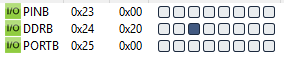


If your're wondering why PINB is changing along with PORTB even though it is not modified. It was explained here:
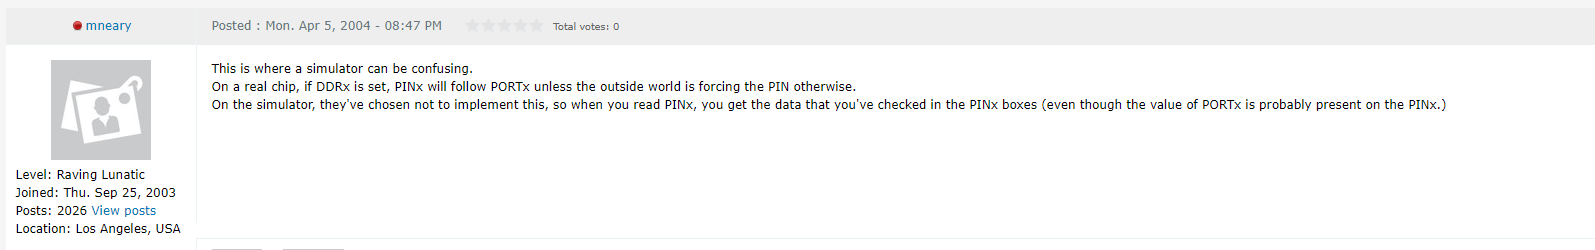

And he mentioned that in the OLDER simulators, PINx is not following PORTx since in the real world it should be. Now in AS7, it is modified to follow whatever PINx and PORTx states are.

                                    <intentional space> 

### BlinkMany Sketch

Blink 6 leds using 3 Pins.

Define Blink delay as 500 milliseconds

Function Declarations: 

Function Declarations are used to declare functions ahead before even defining it. It is always the correct way of dealing with functions with C. A function declaration tells the compiler about a function's name, return type, and parameters. A function definition provides the actual body of the function.

Make Port Pin D2, D3, D4 as outputs. This is actually WRITE bit operation.

To see better what we do above:
POTD2 = 2, PORTD3 = 3, PORTD4 = 4

(1 << PORTD2) is shifting 1 into two positions. 

(1 << PORTD3) is shifting 1 into three positions.

(1 << PORTD4) is shifting 1 into four positions.

ORing them all:

ORing with DDRD:

Hence, we set the three pins without affecting others.

Set Port Pin D2, D3, D4 active LOW. This is actually CLEAR bit operation.

To see better what we do above: 
POTD2 = 2, PORTD3 = 3, PORTD4 = 4

(1 << PORTD2) is shifting 1 into two positions. 

Negating is changing 1 to 0, and 0 to 1:

(1 << PORTD3) is shifting 1 into three positions.

(1 << PORTD4) is shifting 1 into four positions.

ANDing them all:

ANDing with PORTD:

Function Definitions:

This is where we define our functions. Actually the Function Definition starts with void LED1(), but for the sake of simplicity we didn't include it here.

                                    <intentional space> 

### The secrets of pinMode

To simplify things with cryptographic way of bit operations, we will write a simplified functions for those. Well, actually instead of writing a whole new function, we will take a look on how Arduino did it with C++. Let's not reinvent the wheel.

However, there are many prerequisite before we tackle directly into the code.

#### pinMode()
* Processor Directive
* PROGMEM
* _BV()
* pgm_read_byte()
* pgm_read_word()
* digitalPinToBitMask()
    * digital_pin_to_bit_mask_PGM[]
* digitalPinToPort()
    * digital_pin_to_port_PGM[]
* portModeRegister()
    * port_to_mode_PGM[]
* portOutputRegister()
    * port_to_output_PGM[]


                                    <intentional space> 

##### Processor Directive

Preprocessor directives are lines included in the code of programs preceded by a hash sign (#). These lines are not program statements but directives for the preprocessor. The preprocessor examines the code before actual compilation of code begins and resolves all these directives before any code is actually generated by regular statements.

These preprocessor directives extend only across a single line of code. As soon as a newline character is found, the preprocessor directive is ends. No semicolon (;) is expected at the end of a preprocessor directive. The only way a preprocessor directive can extend through more than one line is by preceding the newline character at the end of the line by a backslash (\).

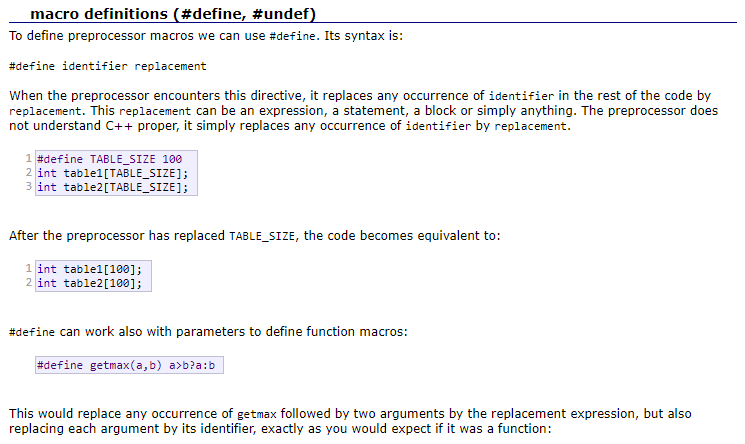

##### PROGMEM

Before that, lets define the different types of memory in AVR.

* Flash memory (program space) 

is where the Arduino sketch is stored.

* SRAM (static random access memory)

is where the sketch creates and manipulates variables when it runs.

* EEPROM 

is memory space that programmers can use to store long-term information.

Flash memory and EEPROM memory are non-volatile (the information persists after the power is turned off). SRAM is volatile and will be lost when the power is cycled. Note: Flash (PROGMEM) memory can only be populated at program burn time. You can’t change the values in the flash after the program has started running. 

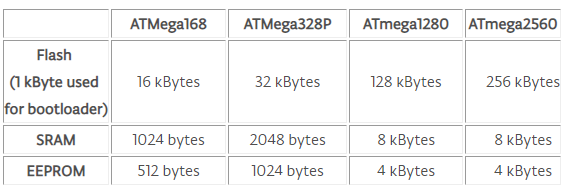

One thing you will notice in the chart above is that there is a lot more Flash (program) memory than SRAM available. When you create variables with the Arduino language such as:

You are copying 33 bytes (1 char = 1 byte, plus terminating null) from program memory into SRAM before using it. 33 bytes isn't a lot of memory in a pool of 1024 bytes, but if the sketch requires some large unchanging data structures - such as a large amount of text to send to a display, or a large lookup table, for example - using flash memory (program memory) directly for storage may be the only option. To do this, use the PROGMEM keyword.

PROGMEM is primarily used to store strings or arrays, in the FLASH and not in the RAM. When strings are used in the program, they are usually hard coded into firmwares source code. 

While this seems the most logical way of using strings, it is not the most optimal. Common sense and intuition would dictate that the compiler would store the string in the program memory, and read it out byte-by-byte inside the LCD_puts() routine. But this is not what happens. Because the LCD_puts() routine (or other string routines) are designed to work with strings in RAM,the compiler is forced to read out the entire string constant from program memory into RAM, and then pass the string’s RAM pointer to the routine (in this case LCD_puts()).

It certainly works but the RAM wastage adds up to significant amounts with each string. Why? Initial variable values and strings are copied out from program memory into RAM as part of the C startup routines, which execute before your main() function. Those startup routines give your globals their initial values, as well as ensure that all strings are inside RAM so they can be passed to your desired string handling routines.  As more strings are added to your program, more data must be copied to RAM at startup and the more RAM is used up by holding static (unchanging) data.The solution to the problem is forcing strings to stay in program memory and only be read out as they are needed.

To force a string into program memory, we can now use thePROGMEM attribute modifier on our string constants.  An example of a global string which is stored into program memory and not copied outat execution time is:

In older AVR-GCC versions, variables tagged with the PROGMEM attribute don’t have to also explicitly be marked as const, however this is changing in newer releases. To prevent compile time warnings,we add this to the variable’s declaration

                                    <intentional space> 

##### _BV

The BV() is defined in "hardware/tools/avr/avr/include/avr/sfr_defs.h", as shown below. This will be automatically included during #include #include <avr/io.h>.

The _BV() is a macro that shifts 1 to left by the specified number. For example, would be:

would be

                                    <intentional space> 

#####  pgm_read_byte()

The pgm_read_byte() is a macro that reads a byte of data stored in a specified address(PROGMEM area).

The pgm_read_byte() is defined in "hardware/tools/avr/avr/include/avr/pgmspace.h" as below.

Note! I don't know why the parameter/argument is named (address_short) but certainly it is not accepting an address or pointer. It accepts an 8 bit variable.

                                    <intentional space> 

#####  pgm_read_word()

The pgm_read_word() is a macro that read a word of data stored in a specified address(PROGMEM area).

The pgm_read_word() is defined in "hardware/tools/avr/avr/include/avr/pgmspace.h" as below.

Note! I don't know why the parameter/argument is named (address_short) but certainly it is not accepting an address or pointer. It accepts an 16 bit variable.

                                    <intentional space> 

##### digitalPinToBitMask()

The digitalPinToBitMask() is defined in "hardware/arduino/cores/arduino/Arduino.h" as below.

The input is P. The macro calls pgm_read_byte() with an argument digital_pin_to_bit_mask_PGM + (P).

The digital_pin_to_bit_mask_PGM is defined in hardware/arduino/variants/standard/pins_arduino.h(in case of Arduino Uno). It is an array shown below. As this array is declared as PROGMEM, it is placed on flash memory rather than SRAM.

As the digital_pin_to_bit_mask_PGM is an array, adding (P) to the digital_pin_to_bit_mask_PGM means the (P+1)th element of the array. In C++ language, the element of array x[i] can be accessed by *(x + i). For example, if the P is 13, the fourteenth element(note that the elements begins with 0) of the array, that is _BV(5), is returned.

As a result digitalPinToBitMask() returns the (P+1)th element of digital_pin_to_bit_mask_PGM which is placed on the flash memory.

This may be absurd at first as to why do we need to pile them up starting from Port D to Port B and finally to Port C. To better understand this idea, it is helpful to see how the arduino Digital Pins and Analog Pins are line up:

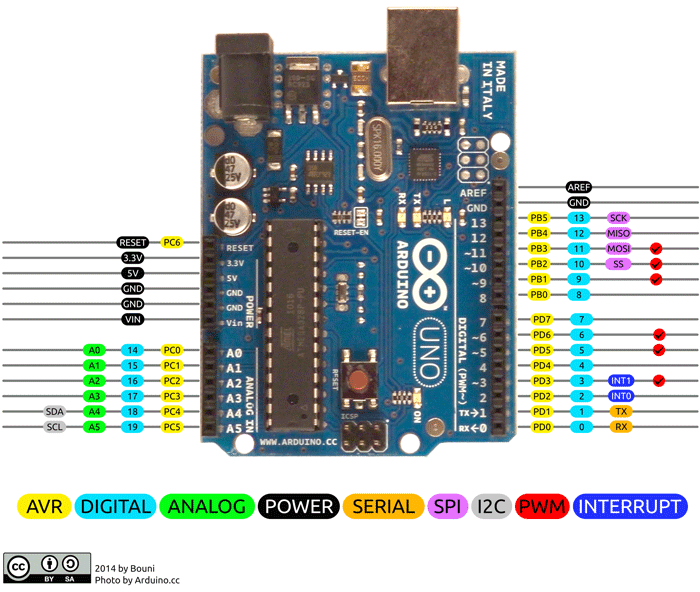

We will find that Pin 0 correspond to _BV(0) at Port D and Pin 14 is _BV(0) to Port C. Note! _BV(0) doesn't mean that we are not shifting 1, it means that we are shifting 1 into the first element or zeroth index.

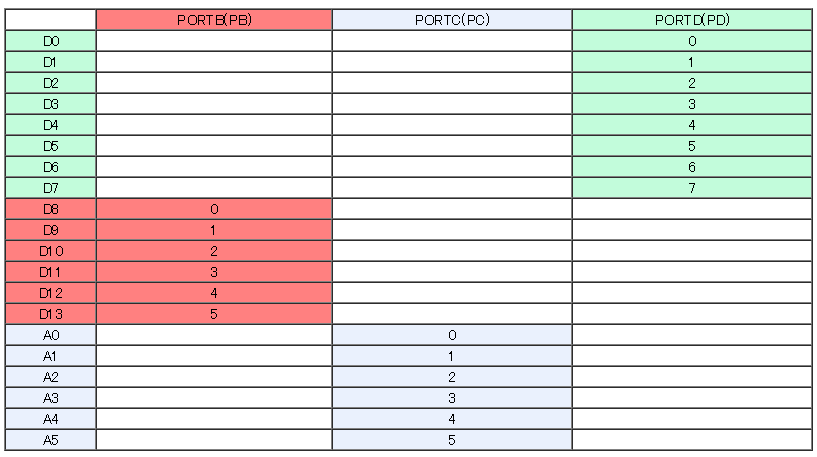

                                    <intentional space> 

##### digitalPinToPort()

The digitalPinToPort() is a macro that returns the port of a specified pin or the (Letter of the Pin) in simple words. The digitalPinToPort() is defined in "hardware/arduino/cores/arduino/Arduino.h" as below.

The input is P. The macro calls pgm_read_byte() with an argument digital_pin_to_port_PGM + (P). The digital_pin_to_port_PGM is defined in hardware/arduino/variants/standard/pins_arduino.h(in case of Arduino Uno). It is an array shown below. As this array is declared as PROGMEM, it is placed on flash memory rather than SRAM. 

This is the same idea as digitalPinToBitMask() above. However since the function pgm_read_byte(), we can't read chars. And yes, PD, PB, and PC have corresponding values from "hardware/arduino/cores/arduino/Arduino.h".

                                    <intentional space> 

#### portModeRegister()

The portModeRegister() is a macro that returns a mode register that controls the mode of the specified port. The portModeRegister() is defined in "hardware/arduino/cores/arduino/Arduino.h" as below.

The input is P. The macro calls pgm_read_word() with an argument pin_to_mode_PGM + (P).

The port_to_mode_PGM is defined in hardware/arduino/variants/standard/pins_arduino.h(in case of Arduino Uno). It is an array shown below. As this array is declared as PROGMEM, it is placed on flash memory rather than SRAM.

As the port_to_mode_PGM is an array, adding (P) to the port_to_mode_PGM means the (P+1)th element of the array. In C++ language, the element of array x[i] can be accessed by *(x + i). For example, if the 

The third element(note that the elements begins with 0) of the array, that is the address of DDRB, is returned.

                                    <intentional space> 

#### portOutputRegister()

The portOutputRegister() is a macro that returns an output port register of the specified port. The portOutputRegister() is defined in "hardware/arduino/cores/arduino/Arduino.h" as below.

The input is P. The macro calls pgm_read_word() with an argument port_to_output_PGM + (P).

The port_to_output_PGM is defined in hardware/arduino/variants/standard/pins_arduino.h(in case of Arduino Uno). It is an array shown below. As this array is declared as PROGMEM, it is placed on flash memory rather than SRAM.

As the port_to_output_PGM is an array, adding (P) to the port_to_output_PGM means the (P+1)th element of the array. In C++ language, the element of array x[i] can be accessed by *(x + i). For example, if the P is PB(2), the third element(note that the elements begins with 0) of the array, that is the address of PORTB, is returned.

PORTB, PORTC and PORTD are registers to execute input or output of digital pins. As a result of portOutputRegister(), it returns the (P+1)th element of port_to_output_PGM that is placed on flash memory.

                                    <intentional space> 

##### Finally! pinMode()

We will recap all the functions or macros we have discussed so far. And analyze step by step each code for the pinMode().

Say we want:

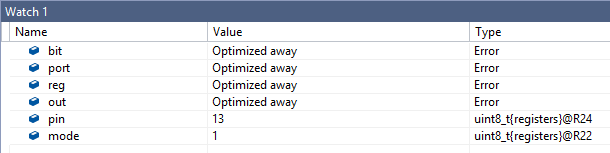

First calculate the bit mask, which bit in the PORTx, of the pin.

It will return:

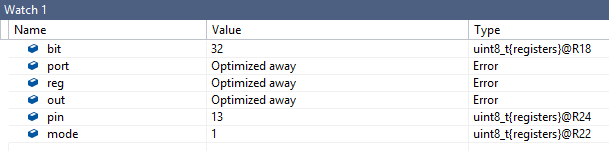

Next, calculate a port corresponds to the pin.

It will return:

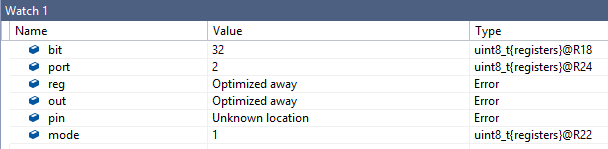

If the port is NOT_A_PIN, the function returns without doing anything more.

I think it might be better to compare with NOT_A_PORT rather than with NOT_A_PIN. Anyway both are defined as 0.

Then, convert the port to a register. It converts the port to the address of DDR. It returns DDRB, DDRC or DDRD according to the port. If the port is PB, it returns DDRB.

However, &PORTB means the address of the register PORTB, which we can find in the I/O in AS7.

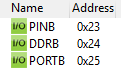
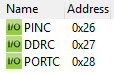
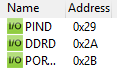

Hence,

It will return:

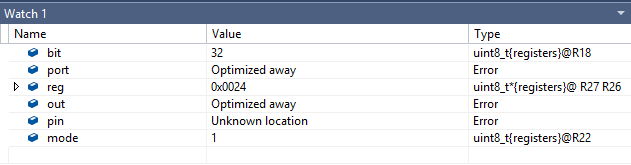

Take note that portModeRegister() uses read_word() instead of read_byte because "On the ATmega1280, the addresses of some of the port registers are greater than 255, so we can't store them in uint8_t's." according to Arduino.h

Next convert the port to PORTx:

It will return:

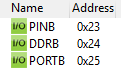
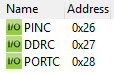
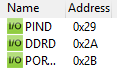

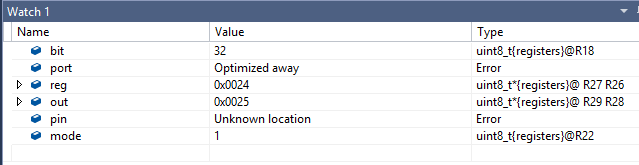

Next line is,

The SREG is a status register which holds interrupt enable flag, carry flag and so on. Before changing the pin mode, SREG is stored to oldSREG. Then disable an interrupt using cli().

But why disable interrupts? From a question in Stackoverflow and Arduino Forum:

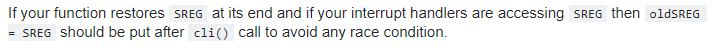

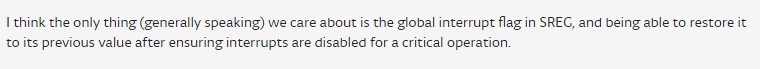

Since, assigning a pin is made during startup and very critical for the program to run properly. I think, it makes the perfect reason to disable interrupts such as pin-change interrupts.

Also, the use of assigning oldSREG = SREG and loading it back is explained by Nick Gammon:

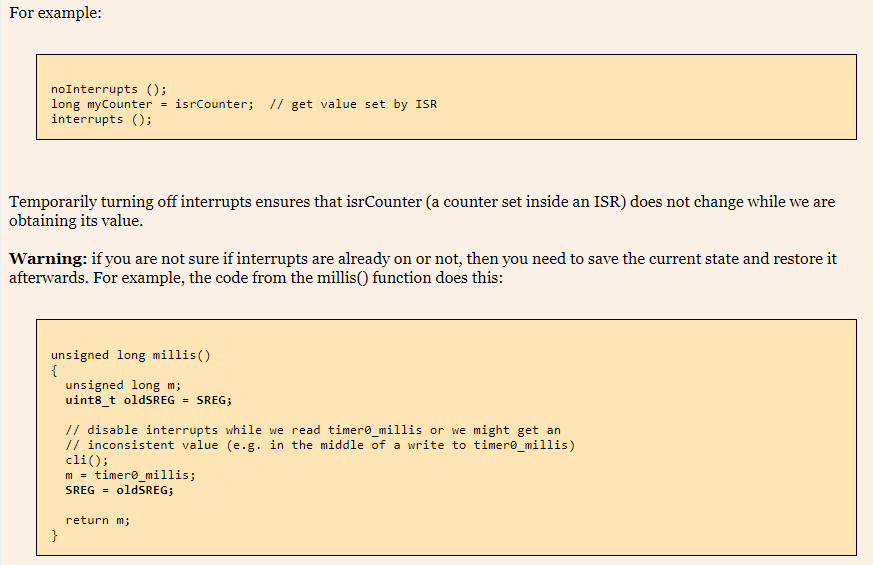

The * is a like a function that takes the value of an address. We know that reg = 0x24 which is the address of DDRB. Then *reg will take the value of DDRB.

Familiar? This is actually the same as CLEAR bit operation.

To make things clearer is we will encapsulate this in another preprocessor directive.

Note: that will not happen in our example from above since we set pinMode as OUTPUT and this will only trigger in pinMode was set to INPUT.

Now, going to INPUT_PULLUP:

Now, this is the WRITE bit operation:

That is, if we want to make a pin INPUT_PULLUP then we need to set DDRx as INPUT and make PORTx as OUTPUT. Here Arduino Forum explain what is the use of INPUT_PULLUP rather than using an external resistor. 

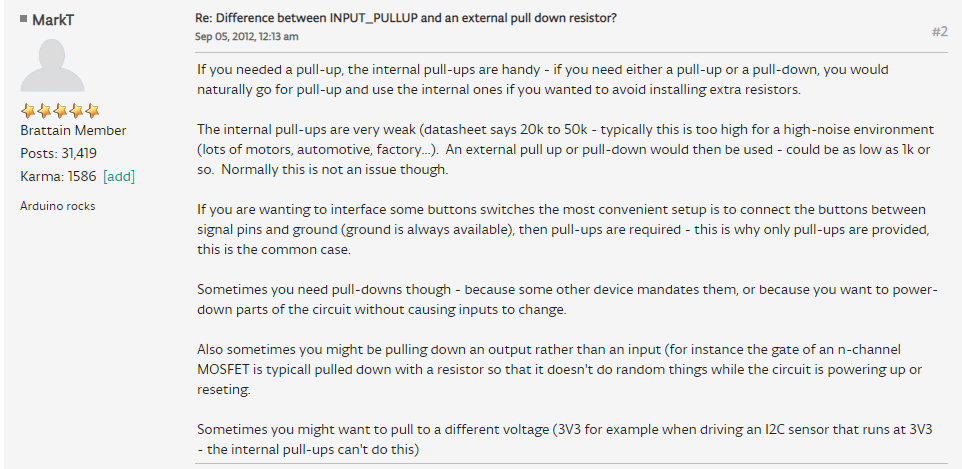

Encapsulating in another preprocessor directive.

Lastly, for the OUTPUT:

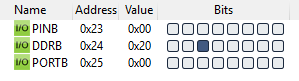

And is the same as pinMode_writeBit() except it will be used in DDRB instead of PORTB that was used in above.

Remeber that INPUT, INPUT_PULLUP and OUTPUT is not native to the compiler but was made to make it easier for the readers to understand the code.

From "hardware/arduino/cores/arduino/Arduino.h":

                                    <intentional space> 